#### Scaling fish data for clustering (no pun intended ;)
Given an array of samples giving measurements of fish where each row represents an individual fish and the measurements, such as weight (g), length (cm), and the percentage ratio of height to length, have very different scales, how can you effectively cluster the data? In order to cluster this data effectively, I'll need to standardize these features first. In this analysis, I'll build a pipeline to standardize and then cluster the data.

These fish measurement data were sourced from the [Journal of Statistics Education](http://jse.amstat.org/jse_data_archive.htm).

In [2]:
# Perform the necessary imports
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
# Create a column names variable since they cannot be inferred from the file of interest.
cols = ['species','weight','length1','length2','length3','height','width']

# Read in the fish csv as a dataframe, and pass column_names explicitly to names parameter.
df = pd.read_csv('datasets/fish.csv', header=None, names=cols)

# Inspect the data
df.head()

,species,weight,length1,length2,length3,height,width
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


#### Kmeans and StandardScaler
To begin, and like I stated earlier, I'll have to be sure to scale all the features before fitting and clustering. I want to accomplish this in a machine learning pipeline, so I'll be applying SciKit Learn's `StandardScaler` function to a `KMeans` estimator.

In [8]:
# Create an array of samples that does not include the fish varieties.
samples = df.drop('species', axis=1).values

# Create scaler
scaler = StandardScaler()

# Create KMeans instance
kmeans = KMeans(n_clusters=4)

# Create pipeline
pipeline = make_pipeline(scaler, kmeans)

In [9]:
# create an array of fish species using 'col1'
species = df.species

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns
df = pd.DataFrame({'labels':labels, 'species':species})

# Create crosstab
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      1      0
1            1     0     19      1
2            0    17      0      0
3            0     0      0     13


#### Cross tabulation
The cross tabulation seen above shows each of the fish species across the top, Bream, Pike, Roach, and Smelt, and one row for each of the 4 clusters (the `n_clusters`) we specfied. This cross tabulation effectively shows how well our chosen clusters fit into the given fish species. We see here that both Roach (19) and Smelt (13) were perfectly estimated by the KMeans model because no other observations occur in row label 2 and 3 respectively. The model incorrectly labeled 1 Bream fish, and 2 Roach species. By in large most fish are labeled into their respective fish species correctly.

#### Intrinsic Dimension
The intrinsic dimensions of a data set are the number of features required to approximate it. It also informs dimension reduction because it tells us how much a data set can be compressed. I'll use PCA again to get a solid understanding of the intrinsic dimensions of the fish data set, by counting the number of PCA features that have a high variance.

I'll plot the intrinsic features as a bar graph to visualize how many of the features are significant.

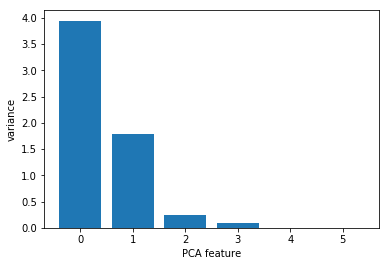

In [10]:
# Perform the necessary imports
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Create scale
scaler = StandardScaler()

# Create a PCA instance
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


##### Dimension reduction of the fish measurements
As you can see above, the fish data is 6 dimensional––meaning it has 6 features--of which only 2 have variance over 1.5. Beacuse of that, we can confidently say that the fish data has 2 principle components. 

Now I'll use Principle Component Analysis for dimensionality reduction of the fish measurements. Given the previous plot show high variance for only 2 features I'll retain only those 2 most important components.

In [11]:
# Import Scale from sklearn
from sklearn.preprocessing import scale

# Scale the fish data
scaled_samples = scale(samples)

# Create a PCA model with 2 components
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


#### Conclusion Dimension Reduction with PCA
I've performed the dimension reduction of the fish data set using PCA and specified the number of `n_components` (2) to keep--the number of intrinsic dimension. Dimension reduction represents the same data with less features. Winning!